# In this project, you will demonstrate the essential skills involved in hypothesis testing. To do so, we will  use  a  real  dataset   that  stems  from  a  replication  attempt  of  published  research  (Wallisch  &  Whritner, 2017). Please write a report (1-2 pages, as needed) that answers all the questions below.  You can pretend you are working for a major movie studio that needs to answer these  questions in order to optimize their operations. You can use figures as needed to buttress/illustrate your argument.  Note that you will need to do a lot of tests (of your choice, as appropriate) to answer these questions, so to  cut down on false positives, set the per-test significance level 𝛼 to 0.005 (as per Benjamin et al., 2018). 

In [66]:
from myModules import movieClass
from os import error
import statistics as st
import numpy as np
import random

Movies = movieClass.movie(verbose=True, alpha=0.005)

# 1. Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular?

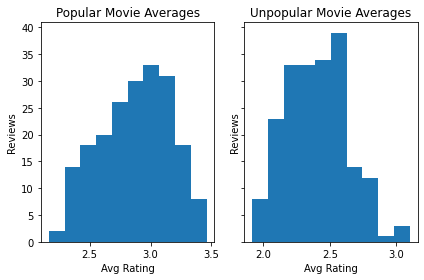

As p-value of 0.00000 is < alpha of 0.005 at test statistic 17.76, we reject the null hypothesis.
There is sufficient evidence to suggest that that movies that are more popular have ratings that are higher than movies that are less popular.



In [67]:

movies_popularities = Movies.popularity()
median_pop = st.median(movies_popularities)
populars = []
sleepers = []
movies_col = Movies.columnData(dropNan=True)

#median-split of movie popularities
for i in range(len(movies_popularities)):
    if movies_popularities[i] > median_pop:
        populars.append(movies_col[i])
    elif movies_popularities[i] < median_pop:
        sleepers.append(movies_col[i])
    if movies_popularities[i] == median_pop:
        choice = random.randint(0, 1)
        if choice:
            populars.append(movies_col[i])
        else:
            sleepers.append(movies_col[i])
    
if (len(sleepers)+len(populars)!=400):error("DATA MISMATCH")
            
sample_means_populars = []
sample_means_sleepers = []
for movie in populars: sample_means_populars.append(np.mean(movie))
for movie in sleepers: sample_means_sleepers.append(np.mean(movie))

Movies.plot(sample_means_populars, sample_means_sleepers, "Q1", n_bins = 10, titleX = "Popular Movie Averages",titleY = "Unpopular Movie Averages", \
    x1="Reviews",y1="Reviews",x2="Avg Rating",y2="Avg Rating")

pval1 = Movies.ttest2(sample_means_populars,sample_means_sleepers, hyp = 'greater', text = "that movies that are more \
popular have ratings that are higher than movies that are less popular.")


# 2. Are movies that are newer rated differently than movies that are older? 

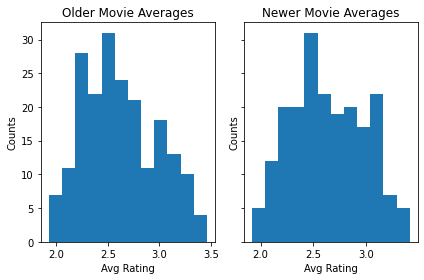

As p-value of 0.60198 is > alpha of 0.005 at test statistic 20603.50, we fail to reject the null hypothesis.
There is insufficient evidence to suggest that that newer movies are rated differently than older films.



In [68]:

movie_yrs = Movies.movieYrs()
mean_yrs = np.mean(movie_yrs)
sample_means_movies = []
for ratings in movies_col: sample_means_movies.append(np.mean(ratings))

#median-split of movie years
newer = []
older = []
median_age = st.median(movie_yrs)
for i in range(len(movie_yrs)):
    if movie_yrs[i] > median_age:
        newer.append(sample_means_movies[i])
    elif movie_yrs[i] < median_age:
        older.append(sample_means_movies[i])

    if movie_yrs[i] == median_age:
        choice = random.randint(0, 1)
        if choice:
            newer.append(sample_means_movies[i])
        else:
            older.append(sample_means_movies[i])

if (len(newer)+len(older)!=400):error("DATA MISMATCH")

Movies.plot(older, newer, "Q2", n_bins = 12, titleX = "Older Movie Averages",titleY = "Newer Movie Averages", \
    x1="Counts",y1="Counts",x2="Avg Rating",y2="Avg Rating")
   
pval2 = Movies.utest2(newer,older, hyp = 'two-sided', text = "that newer movies are rated differently than older films.") 

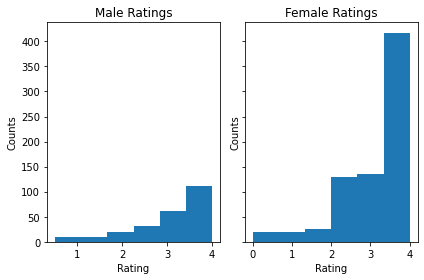

As p-value of 0.04497 is > alpha of 0.005 at test statistic 83202.00, we fail to reject the null hypothesis.
There is insufficient evidence to suggest that that enjoyment of Shrek (2001) is gendered.



In [69]:

shrek_males = [] 
shrek_females = []
#row-wise elimination of entries needed as gender may have NAN for entries movie does not and vice-versa
genders, ratings_shrek = Movies.rowElim('Gender identity (1 = female; 2 = male; 3 = self-described)','Shrek (2001)')

count = 0
for i in range(len(genders)):
   
    if genders[i] == 1:
        shrek_females.append(ratings_shrek[i])
        count+=1
    elif genders[i] == 2:
        shrek_males.append(ratings_shrek[i])
        count+=1
    #due to scarcity of additional info on self-described individuals, gender randomly assigned for them
    elif genders[i] == 3:
        count+=1
        choice = random.randint(0,1)
        if choice:
            shrek_males.append(ratings_shrek[i])
        else:
            shrek_females.append(ratings_shrek[i])
    else: error('GENDER MISMATCH')
if count!=len(shrek_females)+len(shrek_males):error('POSSIBLE DATA MISMATCH')

Movies.plot(shrek_males, shrek_females, "Q3", n_bins = 6, titleX = "Male Ratings",titleY = "Female Ratings", \
    x1="Counts",y1="Counts",x2="Rating",y2="Rating")

pval3 = Movies.utest2(shrek_males,shrek_females, hyp = 'two-sided', text = "that enjoyment of Shrek (2001) is gendered.")  

# 3. Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently? 

In [70]:
# 4. What proportion of movies are rated differently by male and female viewers? 
prop4, pvals4 = Movies.utest2_prop(xcol_title = 'Gender identity (1 = female; 2 = male; 3 = self-described)', \
    options = [1, 2, 3], hyp = 'two-sided', text="show gendered preferences.")

About 12.75% of movies (51) show gendered preferences.



# 5. Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings? 

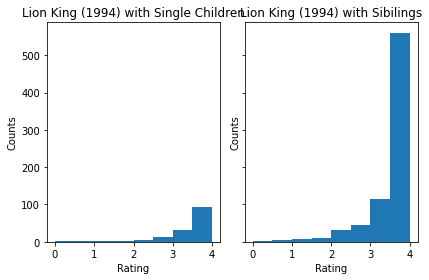

As p-value of 0.97842 is > alpha of 0.005 at test statistic 52929.00, we fail to reject the null hypothesis.
There is insufficient evidence to suggest that single children without siblings enjoy Lion King (1994) more.



In [71]:

LK_single = [] 
LK_multi = []
#row-wise elimination of entries needed as gender may have NAN for entries movie does not and vice-versa
status, ratings_LK = Movies.rowElim('Are you an only child? (1: Yes; 0: No; -1: Did not respond)','The Lion King (1994)')

count = 0
for i in range(len(status)):
    if status[i] == 1:
        LK_single.append(ratings_LK[i])
        count+=1
    elif status[i] == 0:
        LK_multi.append(ratings_LK[i])
        count+=1
    #neglect the few who did not respond as there is not a guaranteed "50/50" chance someone has siblings 
if count!=len(LK_single)+len(LK_multi):error('POSSIBLE DATA MISMATCH')

Movies.plot(LK_single, LK_multi, "Q4", n_bins = 8, titleX = "Lion King (1994) with Single Children",titleY = "Lion King (1994) with Sibilings", \
    x1="Counts",y1="Counts",x2="Rating",y2="Rating")

pval5 = Movies.utest2(LK_single, LK_multi, hyp = 'greater', text = "single children without siblings enjoy Lion King (1994) more.")  

# 6. What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings  vs. those without?

In [72]:
pval6, pvals6 = Movies.utest2_prop(xcol_title = 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)', \
    options = [1, 0, 999], hyp = 'two-sided', text="are rated differently by viewers with siblings vs. those without.")
    #Note: 999 signals to neglect the ones who did responded as we don't have a 50/50 chance one has siblings or not

About 1.75% of movies (7) are rated differently by viewers with siblings vs. those without.



# 7. Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone? 

As p-value of 0.94367 is > alpha of 0.005 at test statistic 49303.50, we fail to reject the null hypothesis.
There is insufficient evidence to suggest that people enjoy watching the The Wolf of Wall Street (2013) with others more.



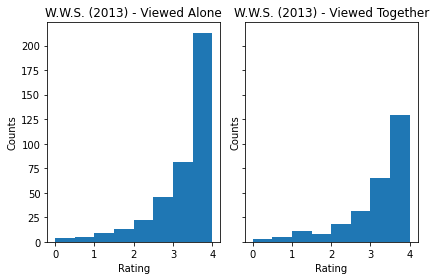

In [73]:

WW_alone = [] 
WW_ppl = []
#row-wise elimination of entries needed as gender may have NAN for entries movie does not and vice-versa
status, ratings_WW = Movies.rowElim('Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)','The Wolf of Wall Street (2013)')

count = 0
for i in range(len(status)):
    if status[i] == 1:
        WW_alone.append(ratings_WW[i])
        count+=1
    elif status[i] == 0:
        WW_ppl.append(ratings_WW[i])
        count+=1
if count!=len(WW_alone)+len(WW_ppl):error('POSSIBLE DATA MISMATCH')
pval7= Movies.utest2(WW_ppl, WW_alone, hyp = 'greater', text = "people enjoy watching the The Wolf of Wall Street (2013) with others more.")  

Movies.plot(WW_alone, WW_ppl, "Q7", n_bins = 8, titleX = "W.W.S. (2013) - Viewed Alone",titleY = "W.W.S. (2013) - Viewed Together", \
    x1="Counts",y1="Counts",x2="Rating",y2="Rating")

# 8. What proportion of movies exhibit such a “social watching” effect? 

In [74]:
prop8, pvals8 = Movies.utest2_prop(xcol_title = 'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)', \
    options = [1, 0, 999], hyp = 'two-sided', text="show a social watching effect.")

About 2.50% of movies (10) show a social watching effect.



# 9. Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?  

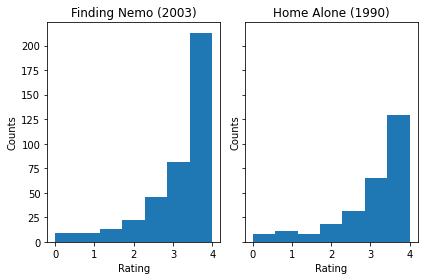

As p-value of 0.00000 is < alpha of 0.005 at test statistic 0.17, we reject the null hypothesis.
There is sufficient evidence to suggest that that the two distributions are different.



In [75]:
ratings_FN = [] 
ratings_HA = []

#row-wise elimination of entries needed as gender may have NAN for entries movie does not and vice-versa
ratings_FN, ratings_HA = Movies.rowElim('Finding Nemo (2003)','Home Alone (1990)')

Movies.plot(WW_alone, WW_ppl, "Q9", n_bins = 7, titleX = "Finding Nemo (2003)",titleY = "Home Alone (1990)", \
    x1="Counts",y1="Counts",x2="Rating",y2="Rating")

pval9 = Movies.kstest2(ratings_HA,ratings_FN,text="that the two distributions are different.")

# 10. There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana  Jones’, ‘Jurassic Park’,  ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset.  How many of these are of inconsistent quality, as experienced by viewers? 

In [77]:

franchisesList = ['Star Wars', 'Harry Potter', 'The Matrix', 'Indiana Jones', 'Jurassic Park', 'Pirates of the Caribbean', 'Toy Story', 'Batman']
discrepant10 = Movies.franchiseDiff(franchisesList, hyp = 'two-sided', text = "quality across its movie ratings.", alpha_ratio= 1)

# Bonus: Do men enjoy horror thrillers more than women?

In [78]:

horrors = ['Alien (1979)','Alien (1979)','Black Swan (2010)','A Nightmare on Elm Street (1984)','Psycho (1960)','Night of the Living Dead (1968)', \
'The Silence of the Lambs (1991)', 'The Others (2001)', 'The Texas Chainsaw Massacre (1974)', 'The Omen (1976)', 'Poltergeist (1982)', 'Poltergeist (1982)', \
'The Conjuring (2013)', 'The Thing (1982)', 'The Shining (1980)', 'Shutter Island (2010)', 'Carrie (1976)', "Rosemary's Baby (1968)", 'The Evil Dead (1981)', \
'The Blair Witch Project (1999)', 'Cloverfield (2008)', "Bram Stoker's Dracula (1992)", 'What Lies Beneath (2000)', 'Friday the 13th Part III (1982)', 'Hannibal (2001)', \
'American Psycho (2000)', 'Predator (1987)', 'Aliens (1986)', "You're Next (2011)", 'Saw (2004)', 'Halloween (1978)', 'The Mist (2007)', 'The Descent (2005)']
table = Movies.table(dropNan = False, moviesOnly = True)
male_more = 0
male_more_alpha2 = 0
for horror in horrors:
    genders, ratings = Movies.rowElim('Gender identity (1 = female; 2 = male; 3 = self-described)', horror)
    males = [] 
    females = []
    
    count = 0
    for i in range(len(genders)):
    
        if genders[i] == 1:
            females.append(ratings[i])
            count+=1
        elif genders[i] == 2:
            males.append(ratings[i])
            count+=1
        #due to scarcity of additional info on self-described individuals, gender randomly assigned for them
        elif genders[i] == 3:
            count+=1
            choice = random.randint(0,1)
            if choice:
                males.append(ratings[i])
            else:
                females.append(ratings[i])
        else: error('GENDER MISMATCH')
    if count!=len(females)+len(males):error('POSSIBLE DATA MISMATCH')
  
    Movies.verbose = False
    pval = Movies.utest2(males,females,hyp='greater')
    
    if pval[1] < Movies.alpha:
        male_more+=1  
        
    if pval[1] < Movies.alpha*2:
        male_more_alpha2+=1  

print('\nOnly {count} of these horror thrillers (about {ratio}%) were enjoyed more by males than females!'.format(count=male_more, ratio = format(100*male_more/len(horrors),".1f")))
print('Even if we double the alpha, only {count} of these horror thrillers (about {ratio}%) seem to be enjoyed more by males than females.\n'.format(count=male_more_alpha2, ratio = format(100*male_more_alpha2/len(horrors),".1f")))



Only 3 of these horror thrillers (about 9.1%) were enjoyed more by males than females!
Even if we double the alpha, only 4 of these horror thrillers (about 12.1%) seem to be enjoyed more by males than females.

